In [2]:
# See https://astropy-tutorials.readthedocs.io/en/latest/rst-tutorials/FITS-images.html
# and https://astropy-tutorials.readthedocs.io/en/latest/rst-tutorials/FITS-header.html
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

In [3]:
# HiRISE EDR converted to FITS using
# https://github.com/cmarmo/convertofits/blob/master/hirise2fits.py
image_file = "ESP_056284_0935_RED.fits"
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: ESP_056284_0935_RED.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 ImageHDU        17   (2048, 60000)   uint8   
  2                1 ImageHDU        17   (2048, 60000)   uint8   
  3                1 ImageHDU        17   (2048, 60000)   uint8   
  4                1 ImageHDU        17   (2048, 60000)   uint8   
  5                1 ImageHDU        17   (2048, 60000)   uint8   
  6                1 ImageHDU        17   (2048, 60000)   uint8   
  7                1 ImageHDU        17   (2048, 60000)   uint8   
  8                1 ImageHDU        17   (2048, 60000)   uint8   
  9                1 ImageHDU        17   (2048, 60000)   uint8   


In [4]:
p_head = hdu_list[0].header
p_head

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [6]:
ext_head = hdu_list[2].header
ext_head[0:5]

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                60000                                                  

In [7]:
ext_head['OBJECT']

KeyError: "Keyword 'OBJECT' not found."

In [12]:
ext_head['OBJECT'] = 'VENUS'
ext_head['TELESCOP'] = 'MAGELLAN'

In [13]:
ext_head['OBJECT']

'VENUS'

In [14]:
ext_head['OBJECT'] = 'MARS'
ext_head['TELESCOP'] = 'MRO'

In [16]:
ext_head['OBJECT']

'MARS'

In [5]:
image_data = hdu_list[2].data

Your data are now stored as a 2-D numpy array. Look at the shape of the array.

In [6]:
print(type(image_data))
print(image_data.shape)
print(image_data.dtype.name)

<class 'numpy.ndarray'>
(60000, 2048)
uint8


In [7]:
image_data = hdu_list[2].data[10000:12048,:]

In [8]:
print(type(image_data))
print(image_data.shape)
print(image_data.dtype.name)

<class 'numpy.ndarray'>
(2048, 2048)
uint8


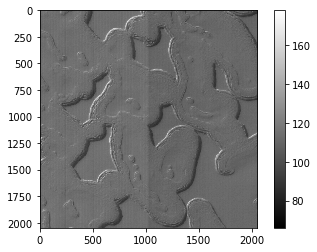

In [36]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [37]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 66
Max: 178
Mean: 112.255517721
Stdev: 5.946907818


In [38]:
image_data0 = hdu_list[2].data[10000:12048,0:1023]
image_data1 = hdu_list[2].data[10000:12048,1024:2047]

In [46]:
print('Min0: ', np.min(image_data0), ', Min1: ', np.min(image_data1))
print('Max0: ', np.max(image_data0), ', Max1: ', np.max(image_data1))
print('Mean0: ', np.mean(image_data0), ', Mean1: ', np.mean(image_data1))
print('Median0: ', np.median(image_data0), ', Median1: ', np.median(image_data1))
print('Stdev0: ', np.std(image_data0), ', Stdev1: ', np.std(image_data1))

Min0:  85 , Min1:  84
Max0:  178 , Max1:  165
Mean0:  114.187444156 , Mean1:  110.38549924
Median0:  115.0 , Median1:  111.0
Stdev0:  5.84264034038 , Stdev1:  5.23855134407


In [42]:
hdu_list.close()

In [51]:
subimage_data0 =  image_data0 - np.median(image_data0)
subimage_data1 =  image_data1 - np.median(image_data1)

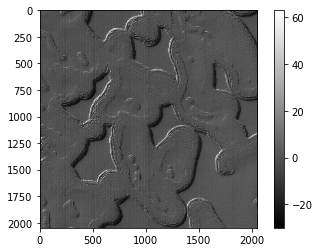

In [52]:
newdata = np.concatenate((subimage_data0, subimage_data1), axis=1)
plt.imshow(newdata, cmap='gray')
plt.colorbar()

In [53]:
outfile = 'hirisestiched.fits'

hdu = fits.PrimaryHDU(newdata)
hdu.writeto(outfile, overwrite=True)